In [2]:
from mouseBehavior import mouseBehaviorData as mbd
import numpy as np
import os, glob

In [2]:
mouseInfo = ('390339', '385531', '385533', '394873',
            '403472', '403468', '409096', '408528',
            '412624', '408527', '416576', '416656',
            '417882', '421323', '422856', '422699',
            '423749', '423750', '423744', '423745',
            '423746', '427937', '429083', '429084',
            '432291', '442594', '459521', '461027',
            '472392', '472395', '481531', '481356',
            '471727', '473189', '474732', '479219',
            '484106', '486622', '486635', '490193',
            '490194', '468670', '470005', '478202', 
            '477121', '473254', '477120', '487461', 
            '473248', '487460', '477810', '476815', 
            '485051', '489138', '495800', '492651', 
            '495662')

mouseInfo = np.unique(mouseInfo)

In [3]:
#checks to see if a mouse behavior object already exists for given mouse so it doesn't have to refetch data from the network
def checkforpickle(directory, mouseID):
    pkllist = [f for f in os.listdir(directory) if '.pkl' in f]
    mouseID = str(mouseID)
    pklpath = None
    for pkl in pkllist:
        if pkl[:6]==mouseID:
            pklpath = os.path.join(directory, pkl)
    return pklpath

In [79]:
#Directory where the mouse object pkls are stored
pkldir = r"\\allen\programs\braintv\workgroups\nc-ophys\corbettb\NP_behavior_pipeline\behavior_sessions\production"
pkl_files = [p for p in os.listdir(pkldir) if '.pkl' in p]
mouseInfo = [p.split('_')[0] for p in pkl_files]
print(mouseInfo)

['509808', '510589', '514938', '521466', '522944', '524760', '524761', '524924', '524925', '524926', '527294', '527749', '530862', '532246', '533537', '533539']


In [80]:
#Directory where the dataframes summarizing behavior are stored (if saved separately)
dataframe_save_dir = r"\\allen\programs\braintv\workgroups\nc-ophys\corbettb\NP_behavior_pipeline\behavior_sessions\all np rigs\dataframes"

dflist = []
mouseids = []
for mouse in mouseInfo:
    if isinstance(mouseInfo[0], tuple):
        mouse = mouse[0]
    print(mouse)
    
    #First look to see if there's already a pkl file with this mouse' data
    pklpath = checkforpickle(pkldir, mouse)
    try:
        #get pkl if it already exists
        if pklpath is not None:
            print('reading from pkl')
            m = mbd()
            m.loadFromPickle(pklpath)
            m.buildBehaviorDataframe(update=True)
#             m.add_weight_and_water_history()
#             m.calculate_behavior_metrics()
#             m.add_metadata_to_dataframe()

        #otherwise make a new one
        else:
            print('fetching data')
            m = mbd(mouse_id=mouse, daysBeforeHandoff=100)
            m.buildBehaviorDataframe(all_sessions=True)

        m.saveDirectory = pkldir
        #m.saveToPickle()
        #m.save_dataframe_separately(dataframe_save_dir)
        dflist.append(m.beh_df)
        mouseids.append(mouse)
    except Exception as e:
        print('failed to load data for mouse ' + mouse, e)
        continue

509808
reading from pkl
updating dataframe with new behavior sessions
510589
reading from pkl
updating dataframe with new behavior sessions
514938
reading from pkl
updating dataframe with new behavior sessions
521466
reading from pkl
updating dataframe with new behavior sessions
522944
reading from pkl
updating dataframe with new behavior sessions
524760
reading from pkl
updating dataframe with new behavior sessions
524761
reading from pkl
updating dataframe with new behavior sessions
524924
reading from pkl
updating dataframe with new behavior sessions
524925
reading from pkl
updating dataframe with new behavior sessions
Found 1 new sessions
Loaded data from behavior-b7176e0c383549baaf3354735685e1f7-524925.pkl
Loaded data from behavior-b7176e0c383549baaf3354735685e1f7-524925.pkl
merging new data into dataframe
524926
reading from pkl
updating dataframe with new behavior sessions
Found 1 new sessions
Loaded data from behavior-b8fc7dc83e614288ab5536a80f91c096-524926.pkl
Loaded data from

In [62]:
m = mbd(mouse_id='533539', daysBeforeHandoff=100)
m.getBehaviorSessionsForMouse()
popdf.loc['533539'][['stage', 'session_datetime_local']]


,stage,session_datetime_local
0,EPHYS_1_images_H_3uL_reward,2020-10-08 15:44:11.498000-07:00
1,EPHYS_1_images_G_3uL_reward,2020-10-07 14:53:34.486000-07:00
2,HABITUATION_5_images_G_handoff_ready_3uL_reward,2020-10-06 13:03:31.340000-07:00
3,HABITUATION_5_images_G_handoff_ready_3uL_reward,2020-10-05 12:26:10.933000-07:00
4,HABITUATION_5_images_G_handoff_ready_3uL_reward,2020-10-02 10:15:47.728000-07:00
5,HABITUATION_5_images_G_handoff_ready_3uL_reward,2020-10-01 10:17:33.967000-07:00
6,HABITUATION_5_images_G_handoff_ready_3uL_reward,2020-09-30 10:01:35.332000-07:00
7,HABITUATION_5_images_G_handoff_ready_5uL_reward,2020-09-29 09:52:46.295000-07:00
8,HABITUATION_5_images_G_handoff_ready_5uL_reward,2020-09-28 09:36:35.813000-07:00
13,TRAINING_4_images_G_training_7uL_reward,2020-09-21 09:57:23.650000-07:00


save population df with all mice concatenated

In [83]:
import pandas as pd
popdf = pd.concat(dflist, keys=mouseids)

c:\users\svc_ccg\appdata\local\continuum\anaconda3\envs\lims\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [84]:
# get mice that have transitioned to lower reward volumes
popdf['session_duration'] = popdf.apply(lambda row: row['trials']['session_duration'][0], axis=1)
lowVol = (popdf['reward_volume'] == 0.003) & (popdf['session_datetime_utc']>'2019')
lowVol_mice = popdf.loc[lowVol].index.get_level_values(0).unique()
lvdf = popdf.loc[lowVol_mice]
lvdf = lvdf.loc[lvdf['session_duration']>2000]

lvdf[['reward_volume', 'stage', 'session_duration', 'earned_rewards']]

reward_volume                                            stage  \
509808 71          0.003                      EPHYS_1_images_H_3uL_reward   
       64          0.003                      EPHYS_1_images_G_3uL_reward   
       62          0.003  HABITUATION_5_images_G_handoff_ready_3uL_reward   
       67          0.003  HABITUATION_5_images_G_handoff_ready_3uL_reward   
       53          0.003  HABITUATION_5_images_G_handoff_ready_3uL_reward   
       53          0.005  HABITUATION_5_images_G_handoff_ready_5uL_reward   
       56          0.005  HABITUATION_5_images_G_handoff_ready_5uL_reward   
       58          0.005  HABITUATION_5_images_G_handoff_ready_5uL_reward   
       57          0.005  HABITUATION_5_images_G_handoff_ready_5uL_reward   
       54          0.005     TRAINING_5_images_G_handoff_ready_5uL_reward   
       55          0.005     TRAINING_5_images_G_handoff_ready_5uL_reward   
       48          0.005     TRAINING_5_images_G_handoff_ready_5uL_reward   
       51          0.005     TRAINING_5_images_G_handoff_ready_5uL_reward   
       47          0.005     TRAINING_5_images_G_handoff_ready_5uL_reward   
       52          0.005     TRAINING_5_images_G_handoff_ready_5uL_reward   
       50          0.005     TRAINING_5_images_G_handoff_ready_5uL_reward   
       46          0.005     TRAINING_5_images_G_handoff_ready_5uL_reward   
       49          0.005     TRAINING_5_images_G_handoff_ready_5uL_reward   
       45          0.005     TRAINING_5_images_G_handoff_ready_5uL_reward   
       44          0.005     TRAINING_5_images_G_handoff_ready_5uL_reward   
       42          0.005     TRAINING_5_images_G_handoff_ready_5uL_reward   
       43          0.005     TRAINING_5_images_G_handoff_ready_5uL_reward   
       41          0.005     TRAINING_5_images_G_handoff_ready_5uL_reward   
       37          0.005     TRAINING_5_images_G_handoff_ready_5uL_reward   
       31          0.005     TRAINING_5_images_G_handoff_ready_5uL_reward   
       40          0.005     TRAINING_5_images_G_handoff_ready_5uL_reward   
       39          0.005     TRAINING_5_images_G_handoff_ready_5uL_reward   
       38          0.005     TRAINING_5_images_G_handoff_ready_5uL_reward   
       36          0.005     TRAINING_5_images_G_handoff_ready_5uL_reward   
       34          0.005     TRAINING_5_images_G_handoff_ready_5uL_reward   
...                  ...                                              ...   
533537 31          0.007          TRAINING_4_images_G_training_7uL_reward   
       39          0.010                  TRAINING_3_images_G_10uL_reward   
       38          0.010                  TRAINING_3_images_G_10uL_reward   
       37          0.010                  TRAINING_3_images_G_10uL_reward   
       36          0.010          TRAINING_2_gratings_flashed_10uL_reward   
       35          0.010          TRAINING_2_gratings_flashed_10uL_reward   
       23          0.010                  TRAINING_1_gratings_10uL_reward   
       21          0.010                  TRAINING_1_gratings_10uL_reward   
       34          0.010                  TRAINING_1_gratings_10uL_reward   
533539 0           0.003                      EPHYS_1_images_H_3uL_reward   
       1           0.003                      EPHYS_1_images_G_3uL_reward   
       2           0.003  HABITUATION_5_images_G_handoff_ready_3uL_reward   
       3           0.003  HABITUATION_5_images_G_handoff_ready_3uL_reward   
       4           0.003  HABITUATION_5_images_G_handoff_ready_3uL_reward   
       5           0.003  HABITUATION_5_images_G_handoff_ready_3uL_reward   
       6           0.003  HABITUATION_5_images_G_handoff_ready_3uL_reward   
       7           0.005  HABITUATION_5_images_G_handoff_ready_5uL_reward   
       8           0.005  HABITUATION_5_images_G_handoff_ready_5uL_reward   
       9           0.005     TRAINING_5_images_G_handoff_ready_5uL_reward   
       10          0.005     TRAINING_5_images_G_handoff_ready_5uL_reward   
       

In [149]:
m = lvdf.loc['472392']
# m.loc[m['reward_volume']==0.005][['stage', 'reward_volume']]
# m.loc[(m['reward_volume'].diff()>0)][['stage', 'reward_volume']]
# m.loc[(m['reward_volume'].diff()>0)&(m['reward_volume']==0.007)][['stage', 'reward_volume']]
handoff = m['stage'].str.contains('handoff')
mh = m.loc[handoff]
mh

,FA_rate_engaged,Maternal_Index,Paternal_Index,WE_ml,WS_ml,Wt_g,abort_rate_engaged,age,baseline_weight,behavior_training_id,...,stage,storage_directory,temp_output_file_location,timeFromLastSession,total_rewards,trials,updated_at,user_id,weight_datetime,session_duration
0,0.290323,436598,447952,0,1.06,21.1,0.567164,279,26.07,None,...,TRAINING_4_images_A_handoff_ready_low_volume,/allen/programs/braintv/production/visualbehav...,/allen/programs/braintv/production/incoming/vi...,145.631389,77,index auto_rewarded change_contrast chan...,2020-02-13 01:21:01.259701,716596529.0,2020-02-12 17:28:10,3645.462698
1,0.000000,436598,447952,0.01,1.16,21,0.400000,273,26.07,None,...,TRAINING_4_images_A_handoff_ready_low_volume,/allen/programs/braintv/production/visualbehav...,/allen/programs/braintv/production/incoming/vi...,48.013611,4,index auto_rewarded change_contrast chan...,2020-02-06 23:45:48.592450,716596529.0,2020-02-06 15:47:45,3640.089989
2,0.200000,436598,447952,0.39,1.16,21,0.728460,271,26.07,None,...,TRAINING_4_images_A_handoff_ready_low_volume,/allen/programs/braintv/production/visualbehav...,/allen/programs/braintv/production/incoming/vi...,99.602222,78,index auto_rewarded change_contrast chan...,2020-02-04 23:45:48.132356,716596529.0,2020-02-04 16:47:35,3642.458961
3,0.416667,436598,447952,0.35,0.86,21.3,0.874016,267,26.07,None,...,TRAINING_4_images_A_handoff_ready_low_volume,/allen/programs/braintv/production/visualbehav...,/allen/programs/braintv/production/incoming/vi...,46.401389,70,index auto_rewarded change_contrast cha...,2020-01-31 20:05:47.942146,716596529.0,2020-01-31 12:08:05,3640.525461
4,0.333333,436598,447952,0.24,1.16,21,0.669980,265,26.07,None,...,TRAINING_4_images_A_handoff_ready_low_volume,/allen/programs/braintv/production/visualbehav...,/allen/programs/braintv/production/incoming/vi...,43.543333,48,index auto_rewarded change_contrast chan...,2020-01-29 21:45:51.035503,716596529.0,2020-01-29 13:57:12,3640.058885
5,0.230769,436598,447952,,,,0.670866,263,26.07,None,...,TRAINING_4_images_A_handoff_ready_low_volume,/allen/programs/braintv/production/visualbehav...,/allen/programs/braintv/production/incoming/vi...,99.387500,100,index auto_rewarded change_contrast chan...,2020-01-28 02:10:48.085695,716596529.0,,3647.297311
6,0.208333,436598,447952,0.68,0.46,21.7,0.754545,259,26.07,None,...,TRAINING_4_images_A_handoff_ready_low_volume,/allen/programs/braintv/production/visualbehav...,/allen/programs/braintv/production/incoming/vi...,166.435833,135,index auto_rewarded change_contrast chan...,2020-01-23 22:45:50.063968,716596529.0,2020-01-23 14:49:27,3643.843317
7,0.178571,436598,447952,0.36,1.36,20.8,0.635468,252,26.07,None,...,TRAINING_4_images_A_handoff_ready_low_volume,/allen/programs/braintv/production/visualbehav...,/allen/programs/braintv/production/incoming/vi...,71.297500,71,index auto_rewarded change_contrast chan...,2020-01-17 18:11:03.603852,716596529.0,2020-01-16 16:27:31,3642.316225
8,0.300000,436598,447952,0.39,1.16,21,0.611746,249,26.07,None,...,TRAINING_4_images_A_handoff_ready_low_volume,/allen/programs/braintv/production/visualbehav...,/allen/programs/braintv/production/incoming/vi...,73.243611,78,index auto_rewarded change_contrast chan...,2020-01-14 01:06:09.507431,716596529.0,2020-01-13 17:26:07,3643.110306
9,0.346154,436598,447952,0.41,0.86,21.3,0.686657,246,26.07,None,...,TRAINING_4_images_A_handoff_ready_low_volume,/allen/programs/braintv/production/visualbehav...,/allen/programs/braintv/production/incoming/vi...,24.834722,82,index auto_rewarded change_contrast chan...,2020-01-10 23:51:09.356459,716596529.0,2020-01-10 15:47:48,3640.777255


<IPython.core.display.Javascript object>


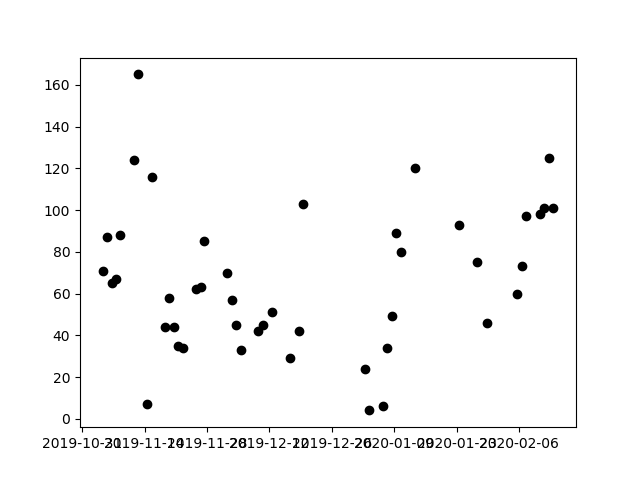

,stage,rig,earned_rewards
0,TRAINING_5_images_A_handoff_ready,NP.0-Stim,101
1,TRAINING_5_images_A_handoff_ready,NP.0-Stim,125
2,TRAINING_5_images_A_handoff_ready,NP.0-Stim,101
5,TRAINING_5_images_A_handoff_ready,NP.0-Stim,98
6,TRAINING_5_images_A_handoff_ready,NP.0-Stim,97
7,TRAINING_4_images_A_handoff_ready_low_volume,NP1,73
8,TRAINING_5_images_A_handoff_ready,NP.0-Stim,60
10,TRAINING_5_images_A_handoff_ready,NP.0-Stim,46
12,TRAINING_4_images_A_handoff_ready_low_volume,NP.0-Stim,75
13,TRAINING_4_images_A_handoff_ready_low_volume,NP.0-Stim,93


In [272]:
plt.figure()
plt.plot(lvdf.loc['489138']['session_datetime'], lvdf.loc['489138']['earned_rewards'], 'ko')
lvdf.loc['489138'][['stage', 'rig', 'earned_rewards']]

<IPython.core.display.Javascript object>


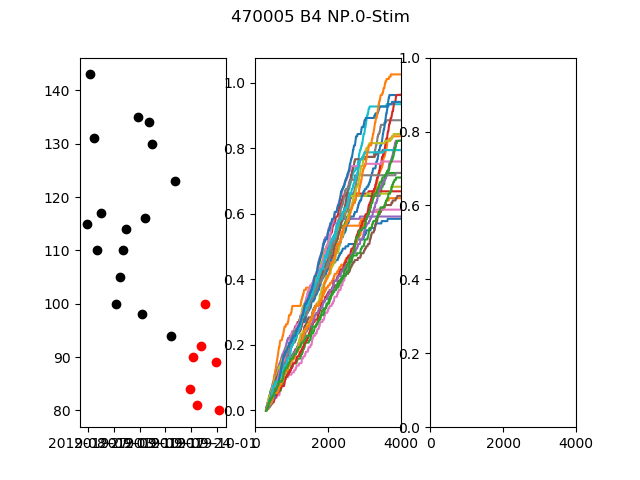

<IPython.core.display.Javascript object>


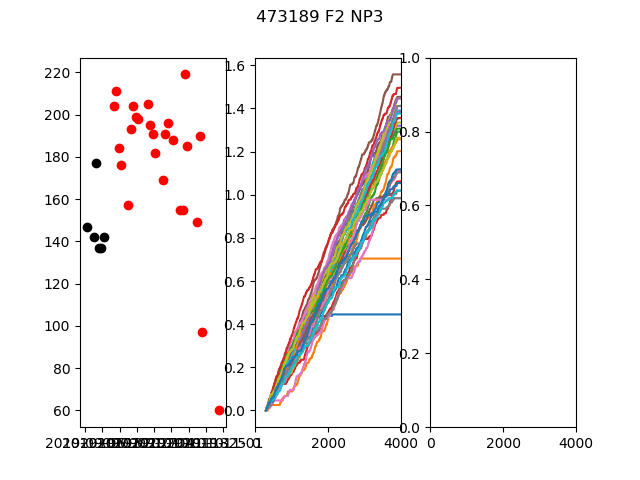

<IPython.core.display.Javascript object>


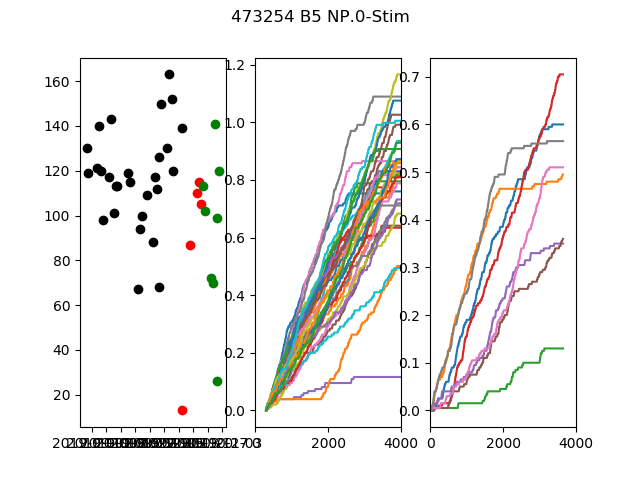

<IPython.core.display.Javascript object>


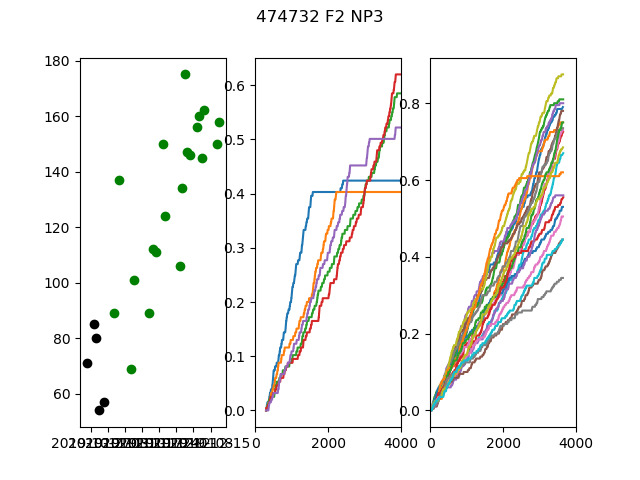

<IPython.core.display.Javascript object>


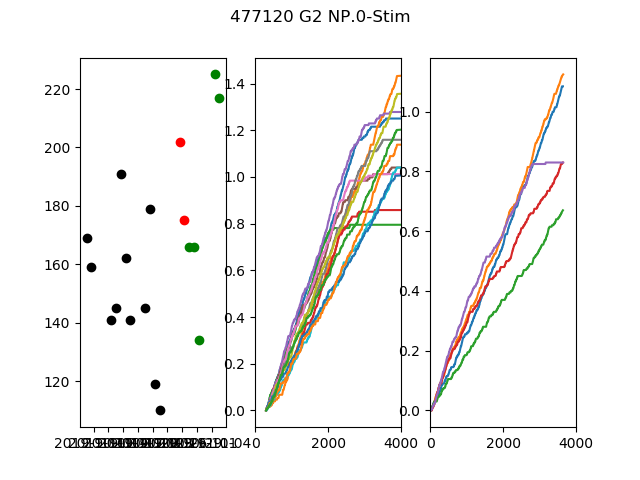

<IPython.core.display.Javascript object>


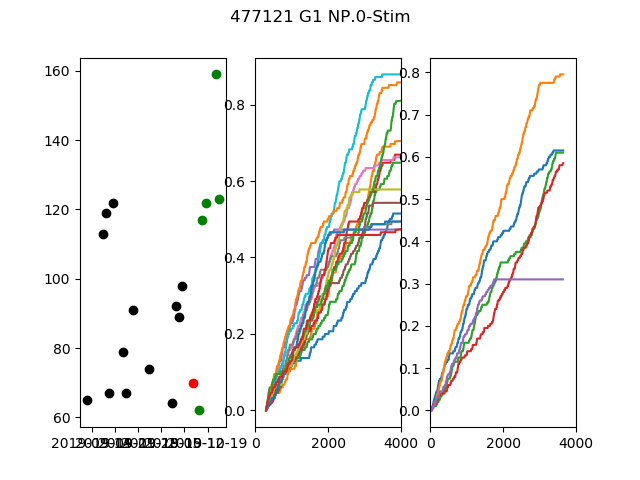

<IPython.core.display.Javascript object>


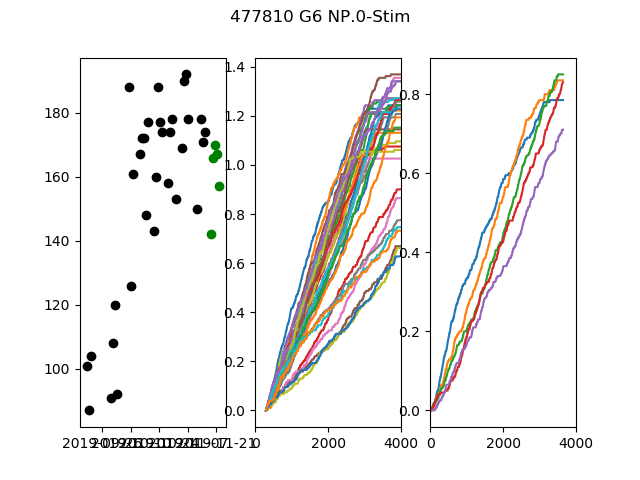

<IPython.core.display.Javascript object>


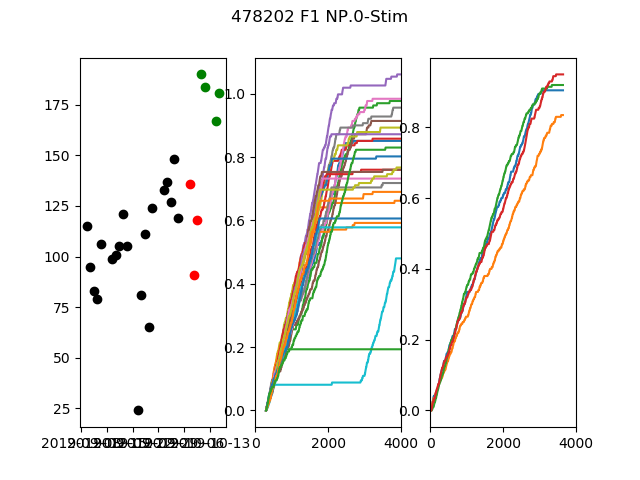

<IPython.core.display.Javascript object>


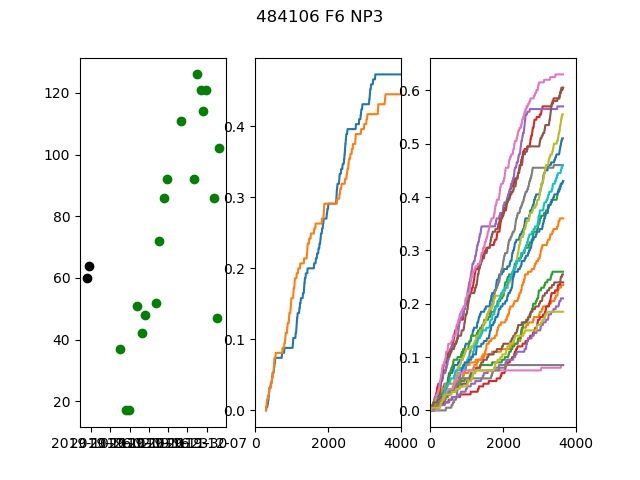

<IPython.core.display.Javascript object>


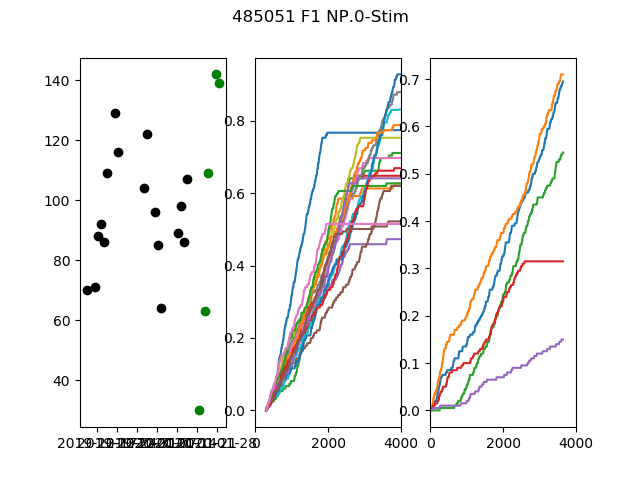

<IPython.core.display.Javascript object>


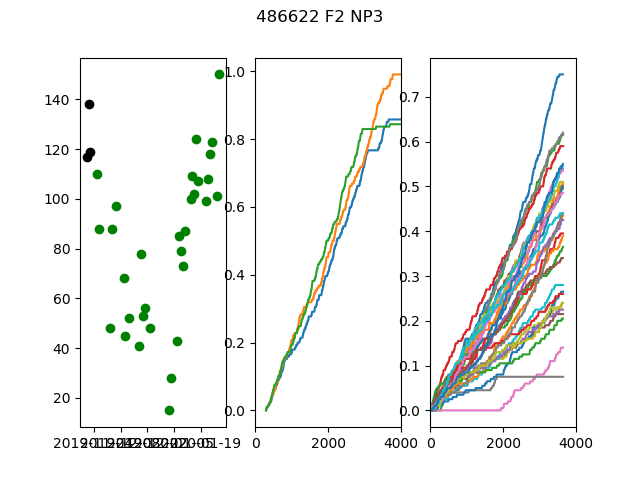

<IPython.core.display.Javascript object>


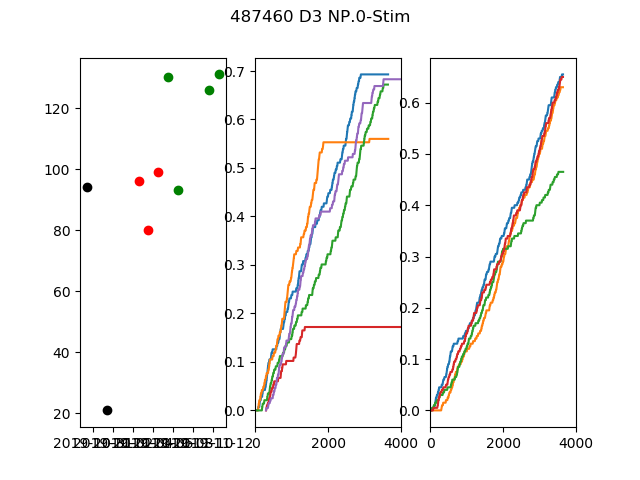

<IPython.core.display.Javascript object>


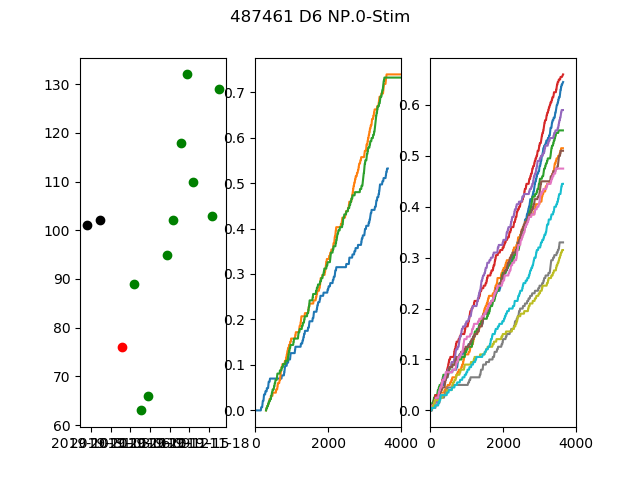

<IPython.core.display.Javascript object>


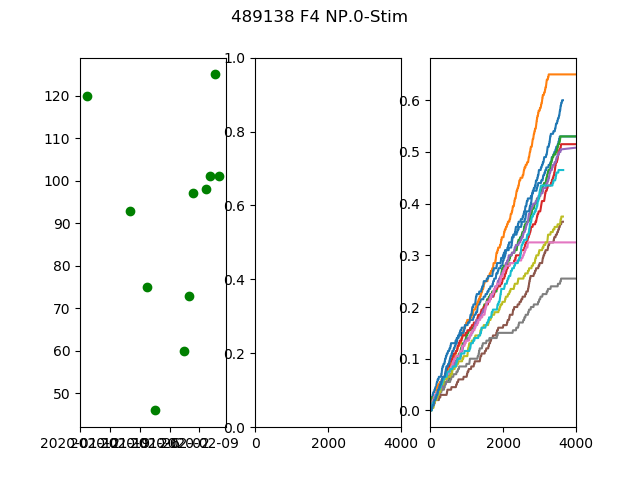

<IPython.core.display.Javascript object>


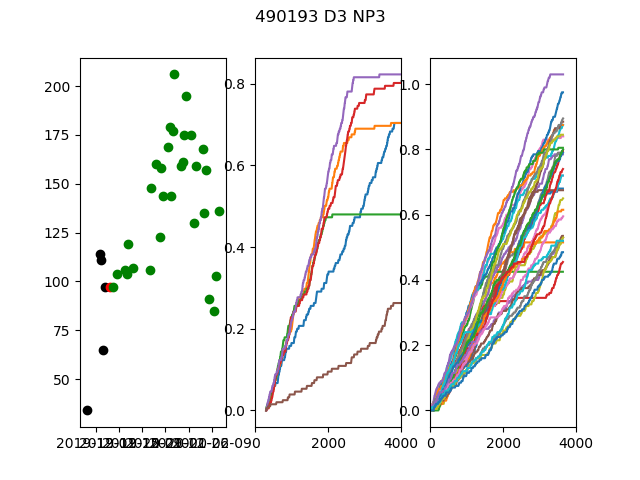

<IPython.core.display.Javascript object>


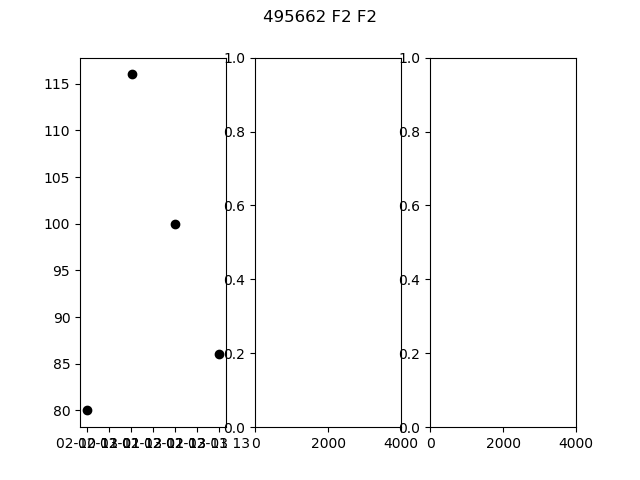

<IPython.core.display.Javascript object>


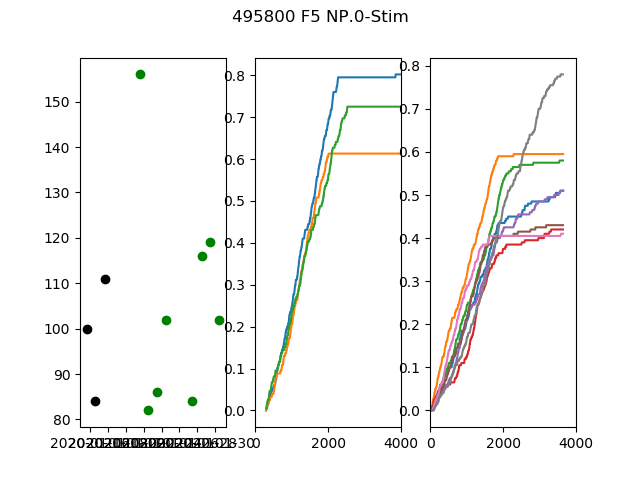

In [299]:
def findSaturationTime(trialdf):
    startTrial = np.where(trialdf['cumulative_volume']>0)[0]
    saturationTrial = np.where(trialdf['cumulative_volume'] > 0.90*trialdf['cumulative_volume'].max())[0]
    if len(saturationTrial)==0:
        saturationTrial = 0
        startTrial = 0
    else:
        saturationTrial = saturationTrial[0]
        startTrial = startTrial[0]
    return np.array(trialdf['endtime'])[saturationTrial] - np.array(trialdf['endtime'])[startTrial]

lvdf['saturation_point'] = lvdf.apply(lambda row: findSaturationTime(row['trials']), axis=1)

# find transitions to lower volume
rv5df = []
rv7df = []
transitions = []
mids = []
for mid, m in lvdf.groupby(level=0):
    
    handoff = (m['stage'].str.contains('handoff_ready'))&(m['earned_rewards']>10)#&(m['rig'].str.contains('NP'))
    mh = m.loc[handoff]
    
    #exclude mice with long gaps in training
    if mh['session_datetime_utc'].diff(-1).max() > pd.Timedelta('14 days'):
        continue
    
    rv5_mask = (mh['reward_volume']==0.005)&(mh['rig'].str.contains('NP'))
    np_mask = mh['rig'].str.contains('NP')
    
    rv5 = mh.loc[(mh['reward_volume']==0.005)&(mh['rig'].str.contains('NP'))]
    rv7 = mh.loc[(mh['reward_volume']==0.007)]# &(mh['rig'].str.contains('NP'))]
    
#     fig, ax = plt.subplots()
#     fig.suptitle(mid + ' ' + m.iloc[0]['rig'])
#     ax.plot(rv5['session_datetime'], rv5['earned_rewards'], 'go')
#     ax.plot(rv7['session_datetime'], rv7['earned_rewards'], 'ko')
#     ax.plot(rv7['session_datetime'].loc[rv7['rig'].str.contains('NP')], rv7['earned_rewards'].loc[rv7['rig'].str.contains('NP')], 'ro')
    fig, ax = plt.subplots(1,3)
    fig.suptitle(mid + ' ' + m.iloc[-1]['rig'] + ' ' + m.iloc[0]['rig'])
    ax[0].plot(mh['session_datetime'].loc[~rv5_mask & ~np_mask], mh['earned_rewards'].loc[~rv5_mask & ~np_mask], 'ko')
    ax[0].plot(mh['session_datetime'].loc[rv5_mask & ~np_mask], mh['earned_rewards'].loc[rv5_mask & ~np_mask], 'bo')
    ax[0].plot(mh['session_datetime'].loc[~rv5_mask & np_mask], mh['earned_rewards'].loc[~rv5_mask & np_mask], 'ro')
    ax[0].plot(mh['session_datetime'].loc[rv5_mask & np_mask], mh['earned_rewards'].loc[rv5_mask & np_mask], 'go')
    
    for it, r in rv7.iterrows():
        ax[1].plot(r['trials']['endtime'], r['trials']['cumulative_volume'])
    ax[1].set_xlim([0, 4000])
#     ax[1].set_title(rv7['stage'].iloc[0])
    
    for it, r in rv5.iterrows():
        ax[2].plot(r['trials']['endtime'], r['trials']['cumulative_volume'])
    ax[2].set_xlim([0, 4000])
#     ax[2].set_title(rv5['stage'].iloc[0])
#     ax.plot(mh['session_datetime'])
    
    #rv5['saturation_point'] = 0
    #rv7['saturation_point'] = rv7.apply(lambda row: findSaturationTime(row['trials']), axis=1)
    rv5df.append(rv5)
    rv7df.append(rv7)
    
    

In [300]:
rv5df = pd.concat(rv5df)
rv7df = pd.concat(rv7df)

In [301]:
mean_5 = rv5df[['earned_rewards', 'engaged_dprime', 'saturation_point']].groupby(level=0).median()
mean_5

,earned_rewards,engaged_dprime,saturation_point
473254,100.5,1.069647,2821.465911
474732,141.0,1.146991,3277.025325
477120,166.0,1.163208,3249.619115
477121,122.0,1.471390,2802.823322
477810,166.0,1.760132,3087.713736
478202,182.5,2.151006,2816.552796
484106,86.0,0.878184,3170.160493
485051,109.0,1.094803,3305.833997
486622,87.0,0.295182,3197.114249
487460,128.0,1.320891,3140.539888


In [302]:
mean_7 = rv7df[['earned_rewards', 'engaged_dprime', 'saturation_point']].groupby(level=0).median()
mean_7

,earned_rewards,engaged_dprime,saturation_point
470005,110,1.115174,2651.627654
473189,184,1.594519,3260.186063
473254,115,1.241153,3136.867796
474732,71,0.749140,2706.886618
477120,159,1.977326,2612.375247
477121,84,0.813717,2698.516083
477810,168,1.612977,2911.148984
478202,106,1.824674,1651.119909
484106,62,0.527641,2657.403044
485051,92,1.056459,2281.760621


        earned_rewards  engaged_dprime  saturation_point
473254           -14.5       -0.171506       -315.401884
474732            70.0        0.397851        570.138707
477120             7.0       -0.814117        637.243868
477121            38.0        0.657673        104.307239
477810            -2.0        0.147155        176.564752
478202            76.5        0.326332       1165.432887
484106            24.0        0.350543        512.757449
485051            17.0        0.038344       1024.073375
486622           -32.0       -1.090437        161.317571
487460            34.0        0.183934        530.603177
487461             1.5       -0.036152        250.762894
490193            47.0        0.109889        897.248749
495800             2.0       -0.731262        170.391563


<IPython.core.display.Javascript object>


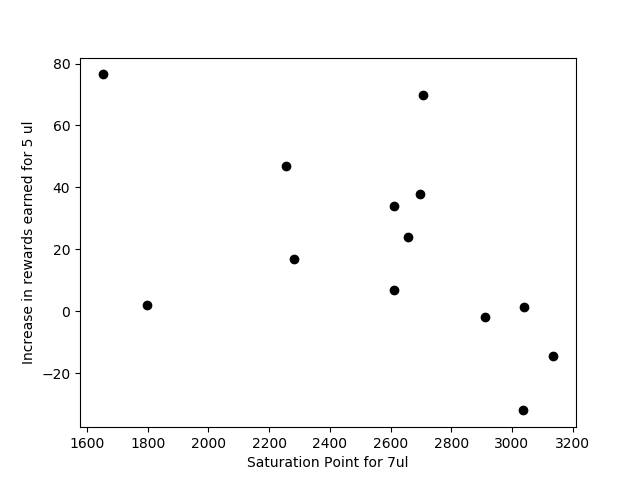

<IPython.core.display.Javascript object>


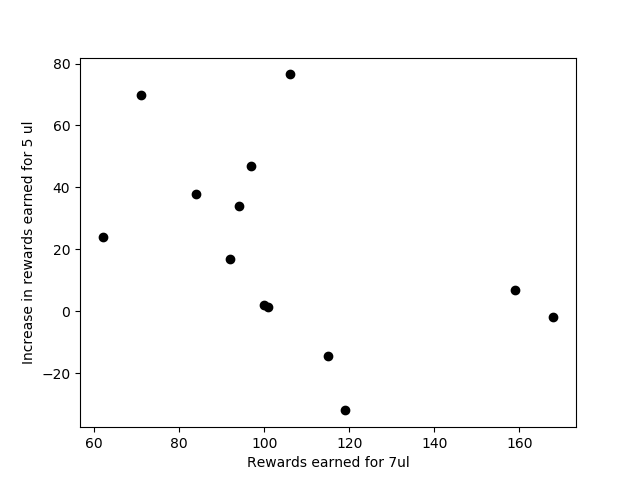

LinregressResult(slope=-0.5011166166515457, intercept=73.3867331984088, rvalue=-0.4768205783595684, pvalue=0.09946044593828682, stderr=0.278533005522487)

In [303]:
mean_diff = mean_5 - mean_7
mean_diff = mean_diff.dropna()
print(mean_diff)

x = rv7df.loc[mean_diff.index.get_level_values(0)].groupby(level=0).median()['saturation_point']
y = mean_diff['earned_rewards']
fig, ax = plt.subplots()
ax.plot(x,y, 'ko')
ax.set_xlabel('Saturation Point for 7ul')
ax.set_ylabel('Increase in rewards earned for 5 ul')
scipy.stats.linregress(x, y)

x = rv7df.loc[mean_diff.index.get_level_values(0)].groupby(level=0).median()['earned_rewards']
y = mean_diff['earned_rewards']
fig, ax = plt.subplots()
ax.plot(x,y, 'ko')
ax.set_xlabel('Rewards earned for 7ul')
ax.set_ylabel('Increase in rewards earned for 5 ul')
scipy.stats.linregress(x, y)

<IPython.core.display.Javascript object>


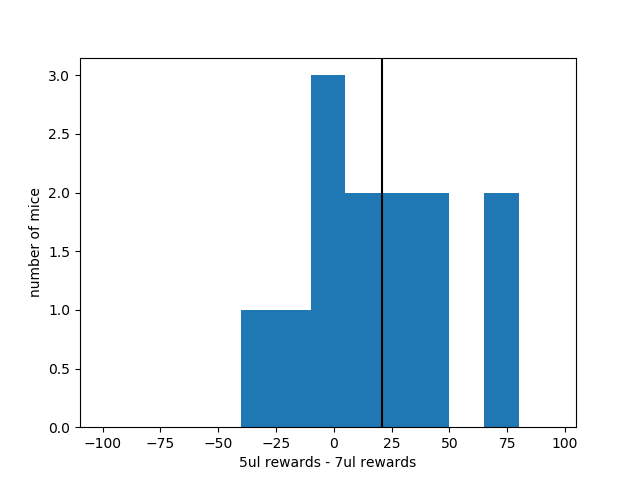

WilcoxonResult(statistic=15.5, pvalue=0.03597499451309836)

In [304]:
%matplotlib notebook
fig, ax = plt.subplots()
ax.hist(mean_diff['earned_rewards'], bins=np.arange(-100, 100, 15))
ax.axvline(np.mean(mean_diff['earned_rewards']), c='k')
ax.set_xlabel('5ul rewards - 7ul rewards')
ax.set_ylabel('number of mice')

import scipy.stats
scipy.stats.wilcoxon(mean_diff['earned_rewards'])

<IPython.core.display.Javascript object>


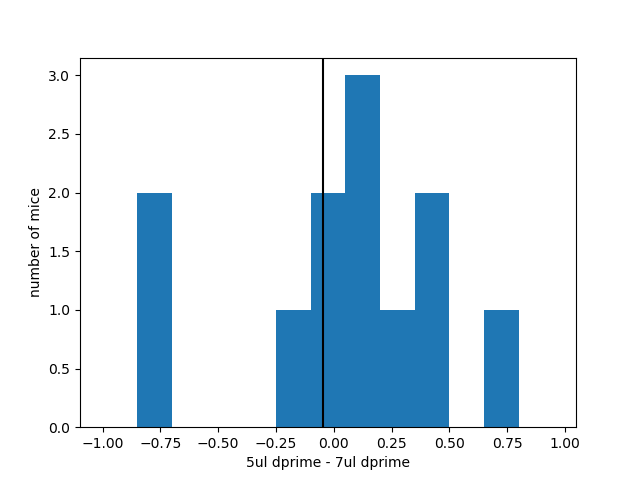

WilcoxonResult(statistic=42.0, pvalue=0.8067663226228976)

In [270]:
fig, ax = plt.subplots()
ax.hist(mean_diff['engaged_dprime'], bins=np.arange(-1, 1, 0.15))
ax.axvline(np.mean(mean_diff['engaged_dprime']), c='k')
ax.set_xlabel('5ul dprime - 7ul dprime')
ax.set_ylabel('number of mice')

import scipy.stats
scipy.stats.wilcoxon(mean_diff['engaged_dprime'])

<IPython.core.display.Javascript object>


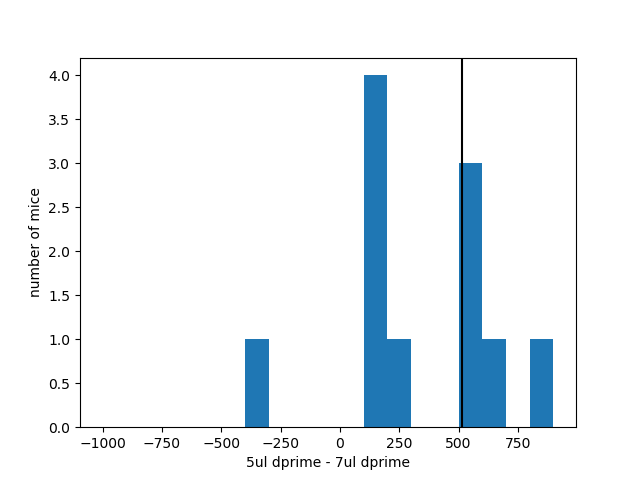

WilcoxonResult(statistic=6.0, pvalue=0.0057715890441035304)

In [305]:
fig, ax = plt.subplots()
ax.hist(mean_diff['saturation_point'], bins=np.arange(-1000, 1000, 100))
ax.axvline(np.median(mean_diff['saturation_point']), c='k')
ax.set_xlabel('5ul dprime - 7ul dprime')
ax.set_ylabel('number of mice')

import scipy.stats
scipy.stats.wilcoxon(mean_diff['saturation_point'])

<IPython.core.display.Javascript object>


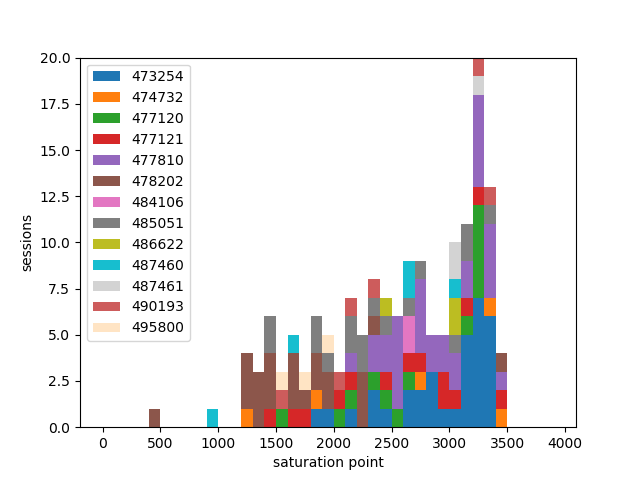

473254    [1876.97522329, 3386.55270558, 2305.90984117, ...
474732    [1207.69579898, 1840.10652242, 3350.02222038, ...
477120    [2431.95538313, 3269.87484461, 1583.89206331, ...
477121    [3257.73075018, 2956.68066845, 3110.743085, 30...
477810    [2345.17963256, 2329.31580401, 2598.12981661, ...
478202    [1961.86903326, 1277.06355971, 2386.21741638, ...
484106                       [2633.72584891, 2681.08023839]
485051    [1449.0026608, 1935.5730695, 2281.7606212, 224...
486622           [3068.8416185, 3035.7966775, 2483.9381074]
487460    [2609.93671181, 1644.24326062, 3023.12512025, ...
487461        [3238.71014474, 3036.34197042, 3040.86144186]
490193    [3227.70529838, 2033.1703748, 1528.8353131, 23...
495800            [1796.7236026, 1541.476258, 1979.9277301]
Name: saturation_point, dtype: object


<IPython.core.display.Javascript object>


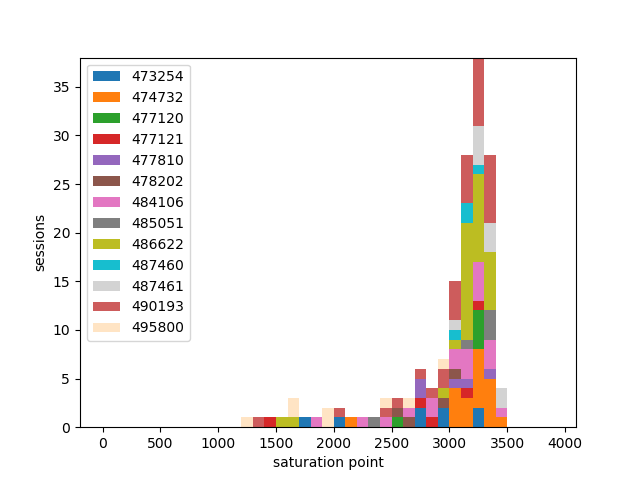

473254    [2727.97764431, 1755.60513059, 2914.95417803, ...
474732    [3137.76721117, 3020.69771493, 3007.9754319, 3...
477120    [3257.25943572, 3249.61911463, 3212.31051938, ...
477121    [2703.67260743, 2802.82332246, 3160.21358106, ...
477810    [2798.67083386, 2773.52785134, 3087.71373606, ...
478202    [2664.55500711, 3060.12766098, 2556.44622081, ...
484106    [3185.62146936, 3404.18410495, 3273.54315501, ...
485051    [3352.25839329, 3305.83399669, 3143.96754708, ...
486622    [3229.51326329, 3197.11424884, 2916.27409728, ...
487460    [3177.61316976, 3007.85092951, 3103.4666072, 3...
487461    [3399.84872181, 3310.37739159, 3265.16500827, ...
490193    [2863.11452152, 2071.61056756, 1352.88455981, ...
495800    [2478.52857122, 1630.01667219, 1940.81811527, ...
Name: saturation_point, dtype: object


In [334]:
#histogram of saturation times across all sessions
%matplotlib qt
shared_mice = np.intersect1d(rv7df.groupby(level=0).mean().index.get_level_values(0),rv5df.groupby(level=0).mean().index.get_level_values(0))

fig, ax = plt.subplots()
sps = rv7df.loc[shared_mice].groupby(level=0)['saturation_point'].apply(list)
print(sps)
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 
          'lightgrey', 'indianred', 'bisque', 'springgreen', 'slateblue']
colors = colors[:len(shared_mice)]
ax.hist(sps, bins=np.arange(0, 4000, 100), stacked=True, color=colors, label=sps.index.get_level_values(0))
ax.set_xlabel('saturation point')
ax.set_ylabel('sessions')
ax.legend(sps.index.get_level_values(0))

fig, ax = plt.subplots()
sps = rv5df.loc[shared_mice].groupby(level=0)['saturation_point'].apply(list)
print(sps)
ax.hist(sps, bins=np.arange(0, 4000, 100), stacked=True, color=colors, label=sps.index.get_level_values(0))
ax.set_xlabel('saturation point')
ax.set_ylabel('sessions')
ax.legend(sps.index.get_level_values(0))

In [9]:
popdf.groupby('stage').mean()['reward_volume']

stage
EPHYS_1_images_G_3uL_reward                         0.003000
EPHYS_1_images_G_5uL_reward                         0.004750
EPHYS_1_images_H_3uL_reward                         0.003000
EPHYS_1_images_H_5uL_reward                         0.005000
HABITUATION_5_images_G_handoff_ready_3uL_reward     0.003000
HABITUATION_5_images_G_handoff_ready_5uL_reward     0.005000
TRAINING_0_gratings_autorewards_15min_0uL_reward    0.005000
TRAINING_1_gratings_10uL_reward                     0.009855
TRAINING_2_gratings_flashed_10uL_reward             0.009868
TRAINING_3_images_G_10uL_reward                     0.009891
TRAINING_4_images_G_training_7uL_reward             0.007000
TRAINING_5_images_G_epilogue_5uL_reward             0.005000
TRAINING_5_images_G_handoff_lapsed_5uL_reward       0.005000
TRAINING_5_images_G_handoff_ready_5uL_reward        0.005000
pretest_EPHYS_1_images_B_5uL_reward                 0.004923
Name: reward_volume, dtype: float64

In [ ]:
#Find the max number of sessions for which at least 15 mice were kept with NSB in handoff ready
num_sessions = np.array(num_sessions)
num_qualifying = [num_sessions>=n for n in range(num_sessions.max())]
max_sessions = np.where([np.sum(q)>=15 for q in num_qualifying])[0][-1]
qualifying = np.where(num_sessions >= max_sessions)[0] 

#Plot the progress of those mice over the max sessions to see if they get better
sess_nos = []
means = []
sems = []
mouse_nos = []
for ns in range(max_sessions):
    sess_nos.append(ns+1)
    mouse_nos.append(len(qualifying))
    num_rewards = [all_rewards[q][ns] for q in qualifying]
    means.append(np.mean(num_rewards))
    sems.append(np.std(num_rewards)/(mouse_nos[-1]**0.5))


fig, ax = plt.subplots()
ax.errorbar(sess_nos, means, yerr=sems)
ax.set_xlabel('sessions')
ax.set_ylabel('earned rewards')

In [95]:
from matplotlib import pyplot as plt
nsb_earned_rewards = []
hab_earned_rewards = []
exp_earned_rewards = []
for mid, m in lvdf.groupby(level=0):
    print(mid)
    hor = m['stage'].str.contains('TRAINING_5')
    m_hor = m.loc[hor]
    er = m_hor['earned_rewards'].values
    print(er)
    nsb_earned_rewards.append(er)
    
    hab = m['stage'].str.contains('HABITUATION')
    m_hab = m.loc[hab]
    er = m_hab['earned_rewards'].values
    hab_earned_rewards.append(er)
    
    exp = m['stage'].str.contains('EPHYS')
    m_exp = m.loc[exp]
    er = m_exp['earned_rewards'].values
    exp_earned_rewards.append(er)
    
#earned_rewards = np.mean(earned_rewards, axis=0)
#plt.plot(earned_rewards)

509808
[166 181 158  88 140  69  70 130 157 112  99  81 136 122 125 147 146 124
 128  73 152 152 184 141 111  89 183 191 160 160 167 204 152 147 186 135
 172]
514938
[159 183 143 141 160 182 152 143 145   0  14  99 142 113 201 176 160 182
 147 150 172 181 179 140 147 157 154 103 111 117 116 108 157 185 201 137
 133 154 174 178  96 147]
521466
[189 164 180 177 165 185 189 180 180 160 157 177 145 163 157  94 150 148
 170 153 165 142 138 144 157 163 133 150 148 142 116  73  92]
524760
[166 181 144  90 199 181 188 137 149 149 107 164 151 123 137 145  89 156
 151 122 151 135 161 138 157 144  83 148 150 150 120 150 155 138 113 106
  79  27 112  52]
524925
[213 225 207 192 186 113 148 109  98 107  89 103 100  97 122 145 146 134
 114 157  82  92  92 123 136  95 134 126  84  67  86 151 108 149 153 142
 143 135 154]
524926
[171 194 143 151 174 159 172  89  57 112 119 109 113  97 101 117 119 106
 157 171 147 154 143 130 104 125 135 120  95 100 119  81 105  82 152 118
 100  95 158 117 122 100  95 

In [86]:
[len(e) for e in earned_rewards]

[37, 42, 33, 40, 39, 48, 29, 20, 15, 19, 4]

(0, 205)

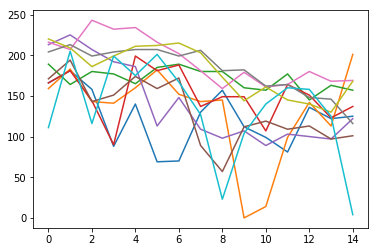

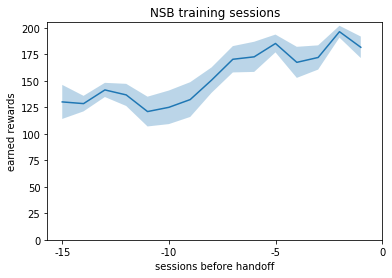

In [110]:
earned_rewards = nsb_earned_rewards
[len(e) for e in earned_rewards]
num_sessions = 15
long_training = earned_rewards[:10]
long_training_array = [l[:num_sessions] for l in long_training]
plt.figure()
[plt.plot(l) for l in long_training_array]
fig, ax = plt.subplots()
MEAN = np.mean(long_training_array, 0)
SEM = np.std(long_training_array,0)/(len(long_training_array)**0.5)
MEAN = MEAN[::-1]
SEM = SEM[::-1]

nsb_mean = MEAN
nsb_sem = SEM

ax.plot(MEAN)
ax.fill_between(np.arange(num_sessions), MEAN-SEM, MEAN+SEM, alpha=0.3)
ax.set_ylabel('earned rewards')
ax.set_xlabel('sessions before handoff')
ax.set_xticks(np.arange(0,num_sessions+5,5))
ax.set_xticklabels(np.arange(0,num_sessions+5,5)-num_sessions)
ax.set_title('NSB training sessions')
ax.set_ylim([0, 205])

(0, 205)

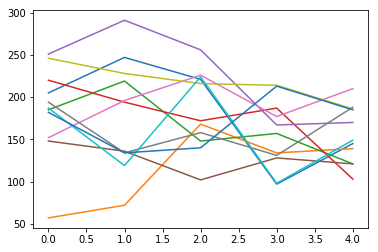

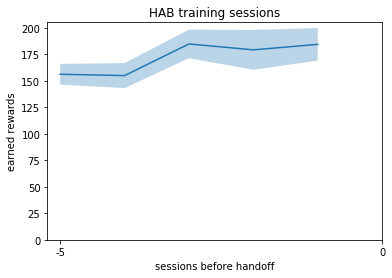

In [111]:
earned_rewards = hab_earned_rewards
[len(e) for e in earned_rewards]
num_sessions = 5
long_training = earned_rewards
long_training_array = [l[:num_sessions] for l in long_training]
plt.figure()
[plt.plot(l) for l in long_training_array]
fig, ax = plt.subplots()
MEAN = np.mean(long_training_array, 0)
SEM = np.std(long_training_array,0)/(len(long_training_array)**0.5)
MEAN = MEAN[::-1]
SEM = SEM[::-1]

hab_mean = MEAN
hab_sem = SEM

ax.plot(MEAN)
ax.fill_between(np.arange(num_sessions), MEAN-SEM, MEAN+SEM, alpha=0.3)
ax.set_ylabel('earned rewards')
ax.set_xlabel('sessions before handoff')
ax.set_xticks(np.arange(0,num_sessions+5,5))
ax.set_xticklabels(np.arange(0,num_sessions+5,5)-num_sessions)
ax.set_title('HAB training sessions')
ax.set_ylim([0, 205])

(0, 205)

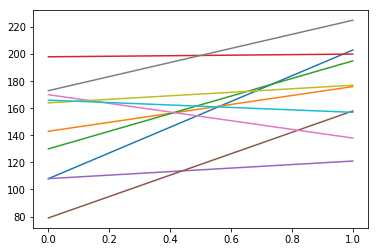

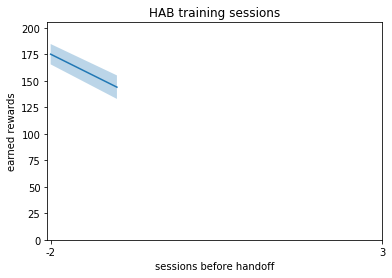

In [112]:
earned_rewards = exp_earned_rewards
[len(e) for e in earned_rewards]
num_sessions = 2
long_training = [e for e in earned_rewards if len(e)>=num_sessions]
long_training_array = [l[:num_sessions] for l in long_training]
plt.figure()
[plt.plot(l) for l in long_training_array]
fig, ax = plt.subplots()
MEAN = np.mean(long_training_array, 0)
SEM = np.std(long_training_array,0)/(len(long_training_array)**0.5)
MEAN = MEAN[::-1]
SEM = SEM[::-1]

exp_mean = MEAN
exp_sem = SEM

ax.plot(MEAN)
ax.fill_between(np.arange(num_sessions), MEAN-SEM, MEAN+SEM, alpha=0.3)
ax.set_ylabel('earned rewards')
ax.set_xlabel('sessions before handoff')
ax.set_xticks(np.arange(0,num_sessions+5,5))
ax.set_xticklabels(np.arange(0,num_sessions+5,5)-num_sessions)
ax.set_title('HAB training sessions')
ax.set_ylim([0, 205])

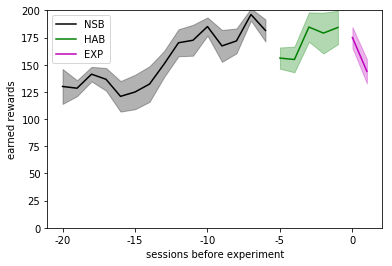

In [134]:
MEAN = np.concatenate([nsb_mean, hab_mean, exp_mean])
SEM = np.concatenate([nsb_sem, hab_sem, exp_sem])
fig, ax = plt.subplots()

nsb_sessions = len(nsb_mean)
hab_sessions = len(hab_mean)
pre_exp_sessions = nsb_sessions + hab_sessions
exp_sessions = len(exp_mean)

ax.plot(np.arange(nsb_sessions), nsb_mean, 'k')
ax.plot(np.arange(nsb_sessions, nsb_sessions + hab_sessions), hab_mean, 'g')
ax.plot(np.arange(pre_exp_sessions, pre_exp_sessions + exp_sessions), exp_mean, 'm')

ax.fill_between(np.arange(nsb_sessions), nsb_mean-nsb_sem, nsb_mean+nsb_sem, alpha=0.3, color='k')
ax.fill_between(np.arange(nsb_sessions, nsb_sessions + hab_sessions), hab_mean-hab_sem, hab_mean+hab_sem, alpha=0.3, color='g')
ax.fill_between(np.arange(pre_exp_sessions, pre_exp_sessions + exp_sessions), exp_mean-exp_sem, exp_mean+exp_sem, alpha=0.3,color='m')

ax.set_ylim([0, 200])
ax.set_ylabel('earned rewards')
ax.set_xlabel('sessions before experiment')
ax.set_xticks(np.arange(0, pre_exp_sessions+2, 5))
ax.set_xticklabels(np.arange(0, pre_exp_sessions+2, 5) - pre_exp_sessions)
ax.legend(['NSB', 'HAB', 'EXP'])

fig.savefig(r"C:\Users\svc_ccg\Desktop\Presentations\NP Behavior Integration Exit\training_progress.PNG")


In [118]:
np.arange(nsb_sessions, hab_sessions)

array([], dtype=int32)

In [121]:
hab_sessions

5